### Analysis of Mental Health Patients Assessments

To help health care providers explore the behavior of mental health issues patients and find a pattern, carried out an exploratory data analysis using the patients data from the GAD-7 assessents.

### Assumptions
- The dataset consists of all the patients who took the assessment using the neuroflow app from 2019-06 to 2020-07.
- 'date' column is the time the assessment was taken by the patient and measured.
- Assessments are generally taken monthly or twice a month.
- All the patients in the data are from the United States.
- Patients are not going through any underlying conditions.

In [1]:
# libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

from tabulate import tabulate

In [2]:
# read the data in csv format
df = pd.read_csv('phq_all_final.csv')

In [3]:
df.head()

,date,patient_id,type,patient_date_created,score
0,2019-08-26T13:32:43.019162,8430,gad7,2019-06-03T13:23:02.63568,6
1,2019-11-15T17:55:11.364877,8430,gad7,2019-06-03T13:23:02.63568,1
2,2019-10-07T18:23:29.611351,14338,gad7,2019-06-03T13:32:30.66846,10
3,2019-11-04T20:16:28.610965,14338,gad7,2019-06-03T13:32:30.66846,7
4,2019-12-02T20:56:55.966354,14338,gad7,2019-06-03T13:32:30.66846,9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53698 entries, 0 to 53697
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   date                  53698 non-null  object
 1   patient_id            53698 non-null  int64 
 2   type                  53698 non-null  object
 3   patient_date_created  53698 non-null  object
 4   score                 53698 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 2.0+ MB


In [5]:
# change the data type of 'date' and 'patient_date_created' features to datetime
df['date'] = pd.to_datetime(df['date'])
df['patient_date_created'] = pd.to_datetime(df['patient_date_created'])

# renaming the date column
df.rename(columns={'date':'patient_date_measured'}, inplace=True)

In [6]:
# time period when the patients were created
patient_date_created_min = min(df['patient_date_created'].dt.date)
patient_date_created_max = max(df['patient_date_created'].dt.date)
print('The dataset consists of patients created between "{}" and "{}"'.format(patient_date_created_min, patient_date_created_max))

# time period when the assessments were measured
date_min = min(df['patient_date_measured'].dt.date)
date_max = max(df['patient_date_measured'].dt.date)
print('The dataset consists of assessments measured between "{}" and "{}"'.format(date_min, date_max))

The dataset consists of patients created between "2019-06-03" and "2020-07-31"
The dataset consists of assessments measured between "2019-06-06" and "2020-07-31"


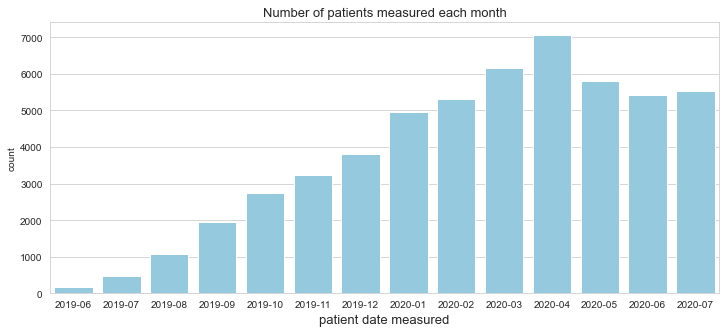

In [7]:
plt.figure(figsize=(12,5))
sns.countplot(df['patient_date_measured'].dt.strftime('%Y-%m').sort_values(), color='skyblue')
plt.title('Number of patients measured each month', fontsize=13)
plt.xlabel('patient date measured', fontsize=13)
plt.show()

- As we can see from the above plot, there is an increase in the number of assessments patients took during March, April and May of 2020. I believe one of reasons for this behavior of patients can be, an increase in the number of covid cases during that time which made people relatively more anxious than usual.

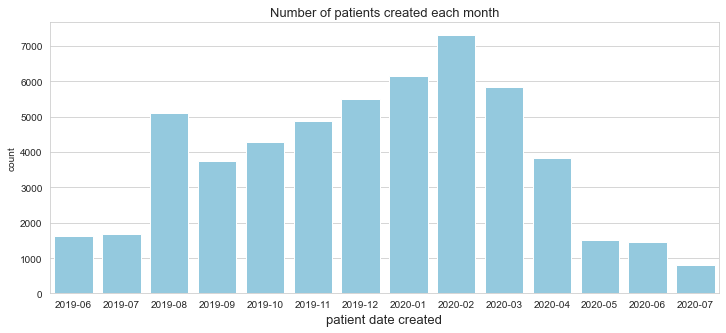

In [8]:
plt.figure(figsize=(12,5))
sns.countplot(df['patient_date_created'].dt.strftime('%Y-%m').sort_values(), color='skyblue')
plt.title('Number of patients created each month', fontsize=13)
plt.xlabel('patient date created', fontsize=13)
plt.show()

- We can observe a sudden increase in the number of patients created in the month of August in 2019 and a gradual increase from there on till the month of Febraury in 2020. This can be due the new collaborations and partnerships of NeuoFlow with the U.S Air Force, Jefferson Health or Genomind Partners.
- The total number of patients who created an account between '2019-06' and '2020-07' is 15502.

In [9]:
# The total number of patients who created an account on neuroflow between 2019-06 & 2020-07 and took the GAD-7 assessment
number_of_patients = df['patient_id'].nunique()
print('The total number of patients who created an account between 2019-06 & 2020-07 and took the assessment: {}'.format(number_of_patients))

The total number of patients who created an account between 2019-06 & 2020-07 and took the assessment: 15502


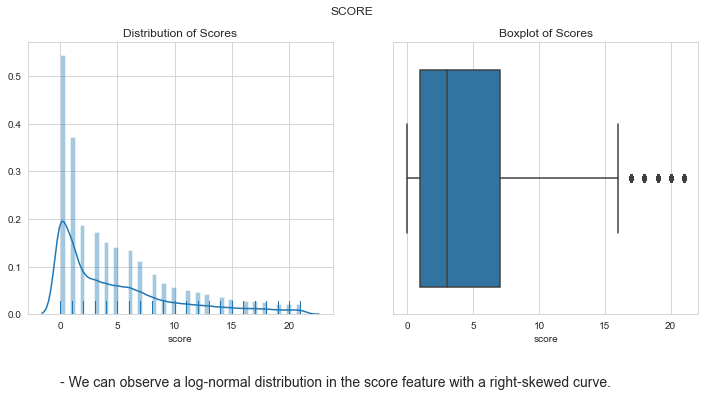

Descriptive Statistics of Score feature
╒═════════╤═════════╤═════════╤═══════╤═══════╤═══════╤═══════╤═══════╕
│   count │    mean │     std │   min │   25% │   50% │   75% │   max │
╞═════════╪═════════╪═════════╪═══════╪═══════╪═══════╪═══════╪═══════╡
│   53698 │ 4.78459 │ 5.24697 │     0 │     1 │     3 │     7 │    21 │
╘═════════╧═════════╧═════════╧═══════╧═══════╧═══════╧═══════╧═══════╛


In [10]:
# SCORE
plt.figure(figsize=(12,5))

# plot for distribution of scores
plt.subplot(1, 2, 1)
plot1 = sns.distplot(df['score'], rug=True)
plt.title('Distribution of Scores')
plot1.text(0, -0.15, '- We can observe a log-normal distribution in the score feature with a right-skewed curve.', fontsize=14)

# boxplot of scores
plt.subplot(1, 2, 2)
sns.boxplot('score', data=df, orient='h')
plt.title('Boxplot of Scores')

plt.suptitle('SCORE')
plt.show()

# descriptive statistics of the score feature
print('Descriptive Statistics of Score feature')
values = list(df.describe()['score'])
table = [['count','mean','std','min','25%','50%','75%','max'], values]
print(tabulate(table, headers=('firstrow'), tablefmt='fancy_grid'))

### Classifying the severity of assessment results based on their score

In [11]:
# patients with score between 0 and 5
low_patients = df[df['score'].between(0, 5)]
print('Percent of patient assessments with a low score: {}%'.format(round(len(low_patients)/len(df)*100, 2)))


# patients with score between 6 and 10
mild_patients = df[df['score'].between(6, 10)]
print('Percent of patient assessments with a mild score: {}%'.format(round(len(mild_patients)/len(df)*100, 2)))

# patients with score between 11 and 15
moderate_patients = df[df['score'].between(11, 15)]
print('Percent of patient assessments with moderate score: {}%'.format(round(len(moderate_patients)/len(df)*100, 2)))

# patients with score between 16 and 21
severe_patients = df[df['score'].between(16, 21)]
print('Percent of patient assessments with high score: {}%'.format(round(len(severe_patients)/len(df)*100, 2)))

Percent of patient assessments with a low score: 65.93%
Percent of patient assessments with a mild score: 19.13%
Percent of patient assessments with moderate score: 8.66%
Percent of patient assessments with high score: 6.28%


In [12]:
# create a column to show the severity level
label = []

for i in df['score']:
    if (i >= 0) and (i <= 5):
        label.append('low')
    elif (i >= 6) and (i <= 10):
        label.append('mild')
    elif (i >= 11) and (i <= 15):
        label.append('moderate')
    elif (i >= 16) and (i <=21):
        label.append('severe')
        
df['severity_label'] = label

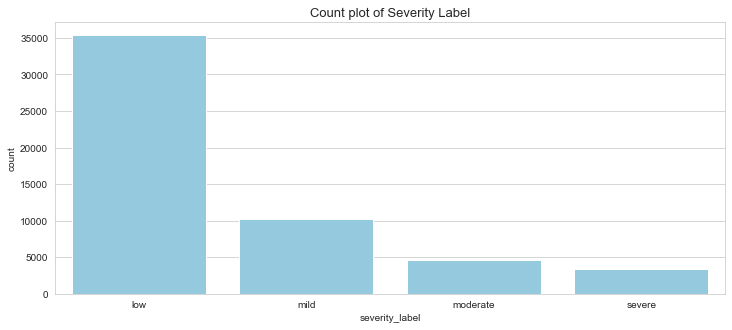

In [13]:
# create a plot for severity label
plt.figure(figsize=(12, 5))
sns.countplot(df['severity_label'], order=['low','mild','moderate','severe'], color='skyblue')
plt.title('Count plot of Severity Label', fontsize=13)
plt.show()

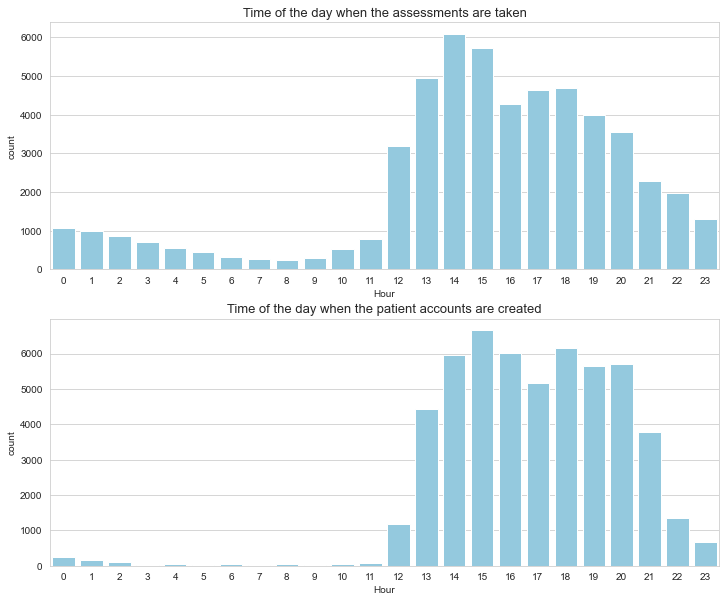

In [14]:
# create a plot to show the hour of the day people prefer to engage
plt.figure(figsize=(12,10))

# plot for assessments taken/measured
plt.subplot(2,1,1)
plot1 = sns.countplot(df['patient_date_measured'].dt.hour, color='skyblue')
plt.title('Time of the day when the assessments are taken', fontsize=13)
plt.xlabel('Hour')

# plot for patient created
plt.subplot(2,1,2)
plot1 = sns.countplot(df['patient_date_created'].dt.hour, color='skyblue')
plt.title('Time of the day when the patient accounts are created', fontsize=13)
plt.xlabel('Hour')

plt.show()

- From the above plots we can clearly see that, patients are largely active during the second half of the day, be it creating the account or taking the assessment.
- A good number of people prefer to take assessments during the midnight but majority of patients take it in the afternoon.

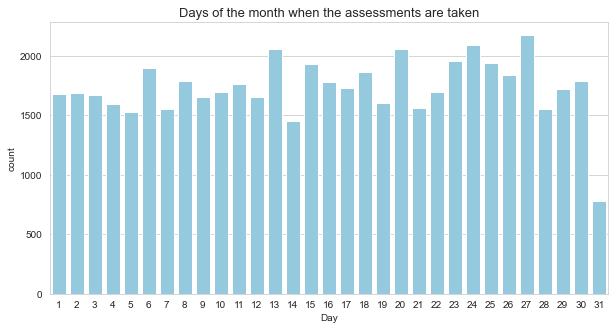

In [15]:
# create a plot for the Days of the month when the assessments are taken
plt.figure(figsize=(10,5))
sns.countplot(df['patient_date_measured'].dt.day, color='skyblue')
plt.title('Days of the month when the assessments are taken', fontsize=13)
plt.xlabel('Day')

plt.show()

- We can observe seasonality in the above plot, there are peaks after a specific interval.
- We can say that people prefer to engage more during the weekends.

### Number of Assessments taken by each patient till date

In [16]:
number_of_assessments_taken = df.groupby('patient_id').count()['type'].tolist()
#print(number_of_assessments_taken)
patient_avg_score = round(df.groupby('patient_id').mean()['score'],2).tolist()
#print(patient_avg_score)

patient_assessment = {'patient_id':df.groupby('patient_id').mean().index, 'number_of_assessments':number_of_assessments_taken,
                         'mean_score':patient_avg_score} 
patient_assessment_data = pd.DataFrame(patient_assessment)
patient_assessment_data.sort_values(by = 'number_of_assessments', ascending=False).head(10)

,patient_id,number_of_assessments,mean_score
9004,10687,84,17.76
5549,6574,42,6.17
10356,12307,38,3.53
11686,13874,34,0.88
11670,13855,34,9.03
12445,14779,33,0.36
9721,11538,32,16.38
1614,1939,31,4.81
4788,5670,28,4.11
1552,1867,28,10.11


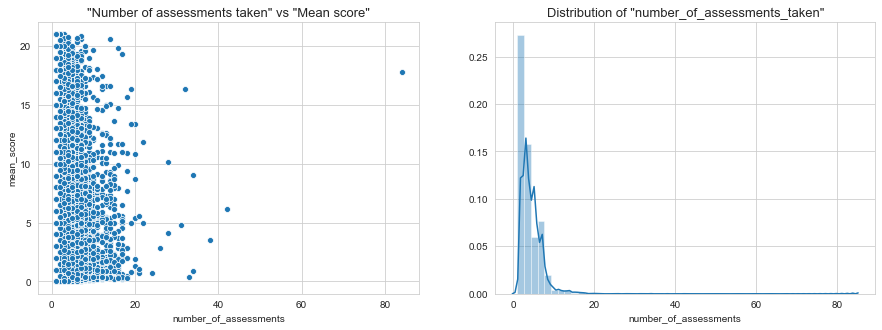

In [17]:
# number of assessments taken
plt.figure(figsize=(15,5))

# plot to show the number of assessments taken by a patient and their mean score
plt.subplot(1,2,1)
plot1 = sns.scatterplot('number_of_assessments','mean_score', data=patient_assessment_data)
#plt.xlim(0,40)
plt.title('"Number of assessments taken" vs "Mean score"', fontsize=13)

# distribution of number of assessments taken
plt.subplot(1,2,2)
plot2 = sns.distplot(number_of_assessments_taken)
plt.title('Distribution of "number_of_assessments_taken"', fontsize=13)
plt.xlabel('number_of_assessments')

plt.show()

- Assuming that a patient usually takes assessments twice a month, on an average a patient takes 24 assessments per year.
- From the above we can observe a few outliers where patients have taken assessments 42 to 84 times.

### Score of outlier patients over time

In [18]:
# create a list of outlier patient ids
outliers = patient_assessment_data.sort_values(by = 'number_of_assessments', ascending=False).head(8)
outlier_patient_ids = outliers['patient_id'].tolist()

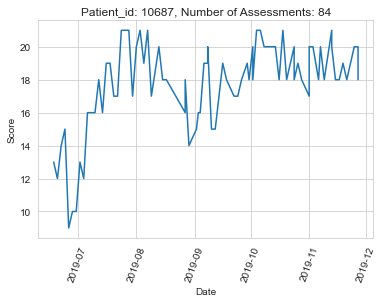

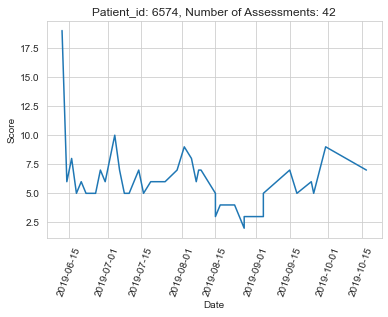

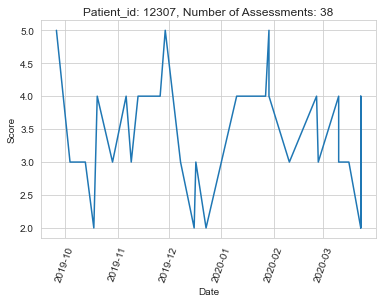

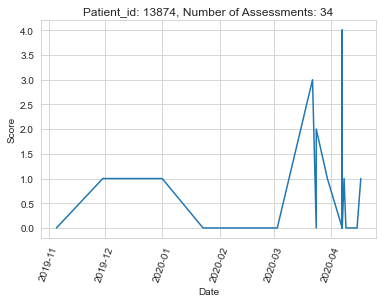

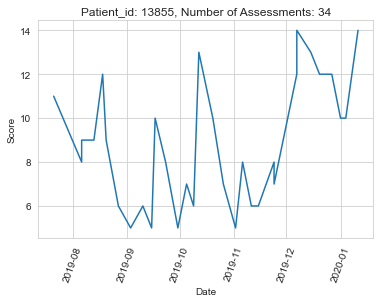

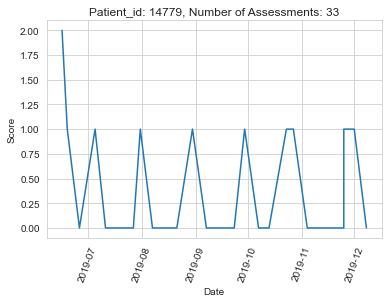

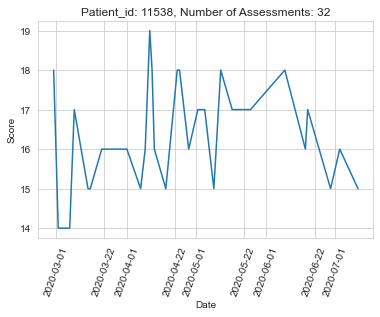

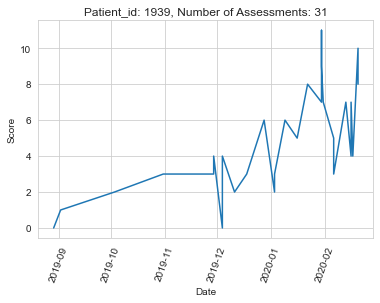

In [19]:
# create the plot
for id_ in outlier_patient_ids:
    fig, ax = plt.subplots()
    ax.plot(df[df['patient_id'] == id_]['patient_date_measured'].dt.date, df[df['patient_id'] == id_]['score'])
    ax.yaxis.get_major_formatter().set_useOffset(False)
    cnt = patient_assessment_data[patient_assessment_data['patient_id'] == id_]['number_of_assessments'].tolist()[0]
    plt.title("Patient_id: {}, Number of Assessments: {}".format(id_, cnt))
    plt.xlabel('Date')
    plt.ylabel('Score')
    plt.xticks(rotation=70)
    plt.show()

### Function to Analyse the progress of patients using 'patient_id'

In [20]:
def patient_progress(patient_id):
    
    '''
    creates a progress plot over time based on score using patient_id
    INPUT: 
          patient_id - id of the patient(int)
    OUTPUT:
           line plot showing the behavior of patient score over time
    '''
    plt.figure(figsize=(10,5))
    plt.plot(df[df['patient_id'] == patient_id]['patient_date_measured'].dt.date, df[df['patient_id'] == patient_id]['score'])
    cnt = patient_assessment_data[patient_assessment_data['patient_id'] == patient_id]['number_of_assessments'].tolist()[0]
    plt.title("Patient_id: {}, Number of Assessments: {}".format(patient_id, cnt))
    plt.xlabel('Date')
    plt.ylabel('Score')
    plt.xticks(rotation=70)
    plt.show()

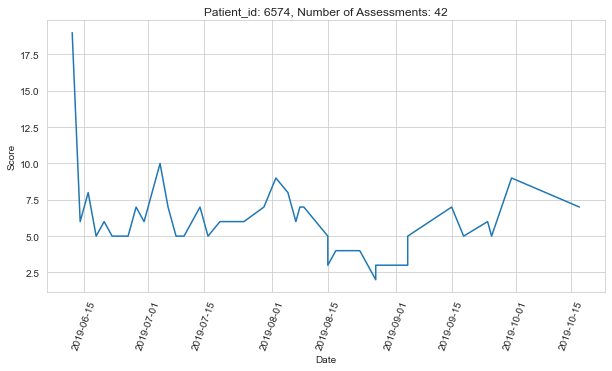

In [21]:
# Health care providers or the patients can see their mental health assessment score pattern over time using this function
patient_progress(6574)

### Additional Information to collect
- Individual scores of all the 7 questions for each assessment.
- Information about if the patient is under any other medication.
- Information about if the patient is going through other underlying condition.